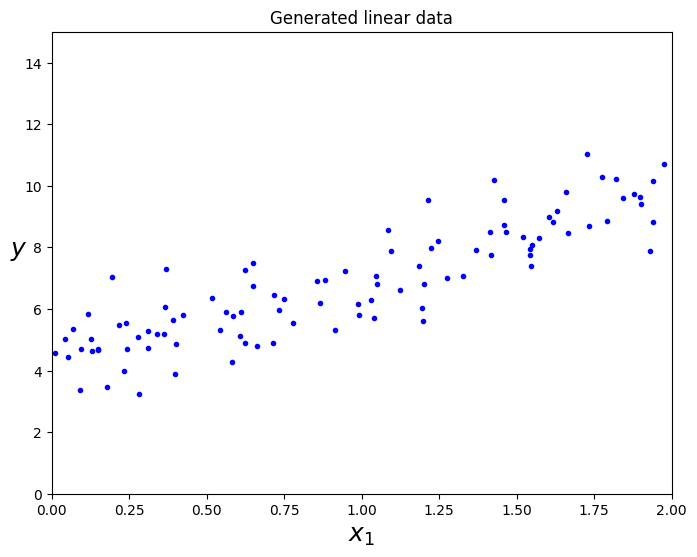

theta_best:
[[4.21509616]
 [2.77011339]]

Predictions:
When x = 0: y = 4.2151
When x = 2: y = 9.7553


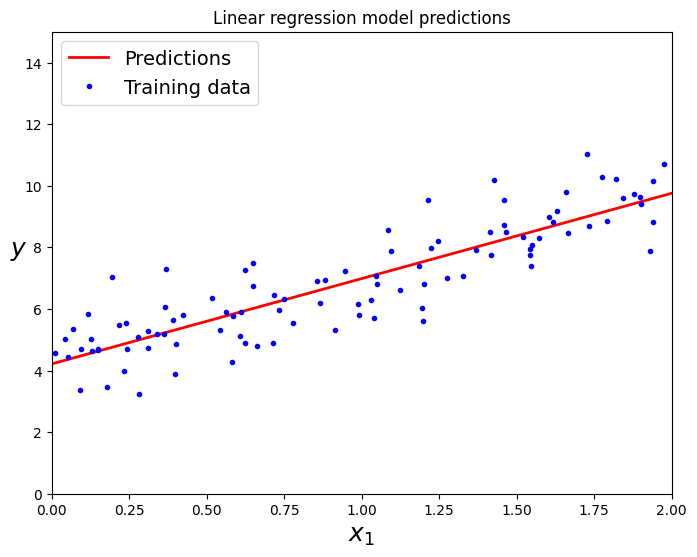


The equation of the line is: y = 4.2151 + 2.7701 * x


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generate linear-looking data
np.random.seed(42)  # for reproducible results
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title("Generated linear data")
plt.show()

# The Normal Equation
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("theta_best:")
print(theta_best)

# Make predictions using theta_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

print("\nPredictions:")
print(f"When x = 0: y = {y_predict[0][0]:.4f}")
print(f"When x = 2: y = {y_predict[1][0]:.4f}")

# Plot the model's predictions
plt.figure(figsize=(8, 6))
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.", label="Training data")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.title("Linear regression model predictions")
plt.show()

print(f"\nThe equation of the line is: y = {theta_best[0][0]:.4f} + {theta_best[1][0]:.4f} * x")

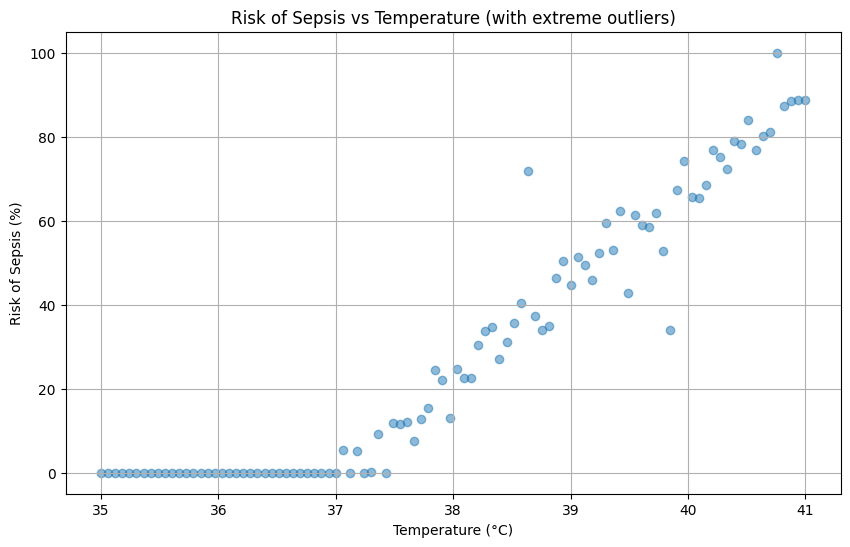

In [23]:
# Create temperature range from 35 to 41 degrees
temp = np.linspace(35, 41, 100)

# Create base risk function (0 until 37°C, then rising)
base_risk = np.where(temp <= 37, 0, (temp - 37) / (41 - 37) * 90)

# Add some random noise to make it non-linear
np.random.seed(42)  # For reproducibility
noise = np.random.normal(0, 5, len(temp))

# Create more extreme outliers
outlier_idx = [20, 40, 60, 80, 95]  # Fixed positions for more control
noise[outlier_idx] = np.array([25, -20, 35, -30, 40])  # More extreme values

# Combine base risk with noise, but keep it at 0 below 37°C
risk = np.where(temp <= 37, 0, base_risk + noise)
risk = np.clip(risk, 0, 100)  # Ensure values stay between 0-100

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(temp, risk, alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Risk of Sepsis (%)')
plt.title('Risk of Sepsis vs Temperature (with extreme outliers)')
plt.grid(True)
plt.show()

🔍 MELHORES PARÂMETROS ENCONTRADOS:
- max_depth: 4
- min_samples_split: 5
- min_samples_leaf: 3
- Score CV: -9.831

📊 MÉTRICAS COMPARATIVAS:
Ensemble     - MSE: 36.01, MAE: 3.00
Árvore Tuned - MSE: 22.79, MAE: 2.61

🚨 ANÁLISE CRÍTICA:
- Ensemble: Linha SUAVE e respeita regra de negócio (0 até 37°C)
- Árvore Tuned: Ainda faz 'ESCADAS' mas com melhor regularização
- MAE: Ensemble = 3.00 vs Árvore = 2.61

🤔 Árvore melhorou, mas ainda tem problema conceitual (steps)
❌ Fundamental: Árvore cria degraus em problema naturalmente linear


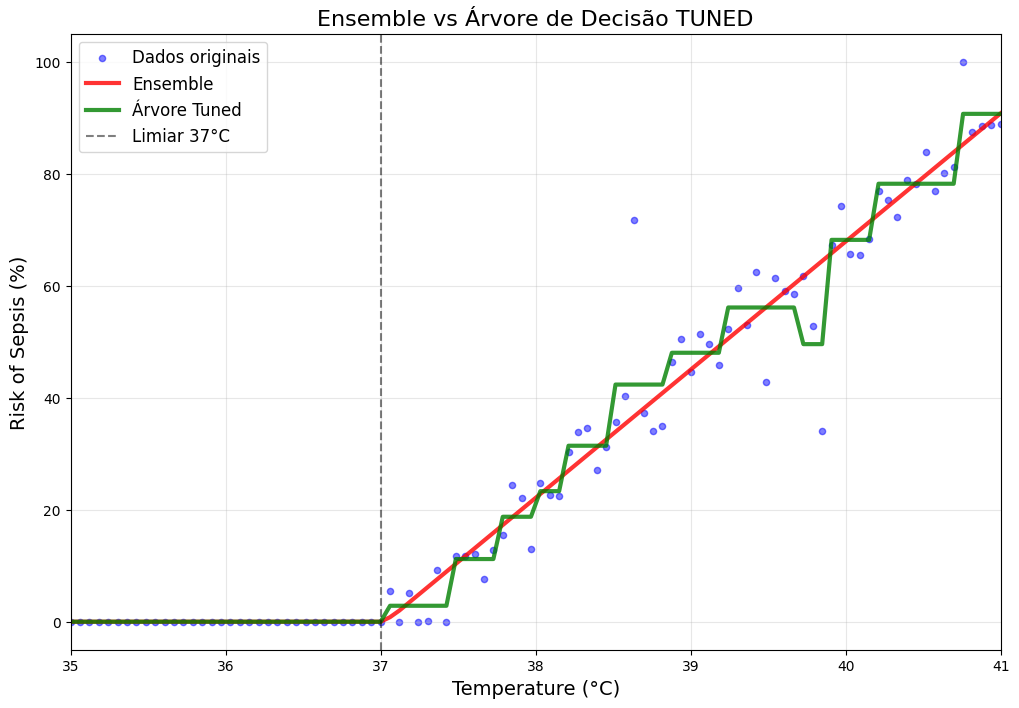

In [27]:
# Calcular métricas de erro com TUNING MELHORADO da Árvore
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# 1. GRID SEARCH para encontrar melhores parâmetros da árvore
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [3, 5, 8, 10],
    'max_features': [1],
    'random_state': [42]
}

# Grid Search com validação cruzada
tree_grid = GridSearchCV(
    DecisionTreeRegressor(), 
    param_grid, 
    cv=5, 
    scoring='neg_mean_absolute_error',  # Usar MAE como métrica
    n_jobs=-1
)

tree_grid.fit(temp.reshape(-1, 1), risk)

# Melhor modelo encontrado
best_tree = tree_grid.best_estimator_
best_tree_predictions = best_tree.predict(temp.reshape(-1, 1))

print("🔍 MELHORES PARÂMETROS ENCONTRADOS:")
print(f"- max_depth: {best_tree.max_depth}")
print(f"- min_samples_split: {best_tree.min_samples_split}")
print(f"- min_samples_leaf: {best_tree.min_samples_leaf}")
print(f"- Score CV: {tree_grid.best_score_:.3f}")

# Comparar métricas
mse_ensemble = mean_squared_error(risk, ensemble_predictions)
mae_ensemble = mean_absolute_error(risk, ensemble_predictions)

mse_tree_tuned = mean_squared_error(risk, best_tree_predictions)
mae_tree_tuned = mean_absolute_error(risk, best_tree_predictions)

print("\n📊 MÉTRICAS COMPARATIVAS:")
print(f"Ensemble     - MSE: {mse_ensemble:.2f}, MAE: {mae_ensemble:.2f}")
print(f"Árvore Tuned - MSE: {mse_tree_tuned:.2f}, MAE: {mae_tree_tuned:.2f}")

print(f"\n🚨 ANÁLISE CRÍTICA:")
print(f"- Ensemble: Linha SUAVE e respeita regra de negócio (0 até 37°C)")
print(f"- Árvore Tuned: Ainda faz 'ESCADAS' mas com melhor regularização")
print(f"- MAE: Ensemble = {mae_ensemble:.2f} vs Árvore = {mae_tree_tuned:.2f}")

if mae_ensemble < mae_tree_tuned:
    print(f"\n✅ VENCEDOR: Ensemble (MAE menor + linha suave)")
else:
    print(f"\n🤔 Árvore melhorou, mas ainda tem problema conceitual (steps)")

print(f"❌ Fundamental: Árvore cria degraus em problema naturalmente linear")

# Plot comparativo atualizado
plt.figure(figsize=(12, 8))
plt.scatter(temp, risk, alpha=0.5, color='blue', label='Dados originais', s=20)
plt.plot(temp, ensemble_predictions, 'r-', linewidth=3, label='Ensemble', alpha=0.8)
plt.plot(temp, best_tree_predictions, 'g-', linewidth=3, label='Árvore Tuned', alpha=0.8)
plt.axvline(x=37, color='black', linestyle='--', alpha=0.5, label='Limiar 37°C')
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Risk of Sepsis (%)', fontsize=14)
plt.title('Ensemble vs Árvore de Decisão TUNED', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(35, 41)
plt.ylim(-5, 105)
plt.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.6542,33.1024,5.4458,0.9483,0.4434,0.2062,0.0130
et,Extra Trees Regressor,3.7224,34.2480,5.5831,0.9495,0.5072,0.1989,0.0090
gbr,Gradient Boosting Regressor,3.8511,38.7867,5.8126,0.9349,0.4777,0.2158,0.0050
ada,AdaBoost Regressor,3.9663,34.4203,5.5199,0.9475,0.5803,0.1906,0.0040
dt,Decision Tree Regressor,4.1203,43.8091,6.1849,0.9239,0.5592,0.2329,0.0020
lr,Linear Regression,8.3609,105.5288,9.9822,0.8350,1.3777,0.3076,0.2690
ridge,Ridge Regression,8.3780,105.5000,9.9840,0.8359,1.3744,0.3090,0.0020
lasso,Lasso Regression,8.4439,105.7618,10.0048,0.8380,1.3642,0.3140,0.0030
en,Elastic Net,9.2632,124.3390,10.8142,0.8337,1.2766,0.3593,0.0020


🏆 TOP 5 MODELOS DO PYCARET:
[RandomForestRegressor(n_jobs=-1, random_state=123), ExtraTreesRegressor(n_jobs=-1, random_state=123), GradientBoostingRegressor(random_state=123), AdaBoostRegressor(random_state=123), DecisionTreeRegressor(random_state=123)]


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.4073,6.3190,2.5138,0.9935,0.2437,0.2681



📊 COMPARAÇÃO FINAL:
Ensemble     - MSE: 36.01, MAE: 3.00
Árvore Tuned - MSE: 22.79, MAE: 2.61
PyCaret Best - MSE: 6.32, MAE: 1.41


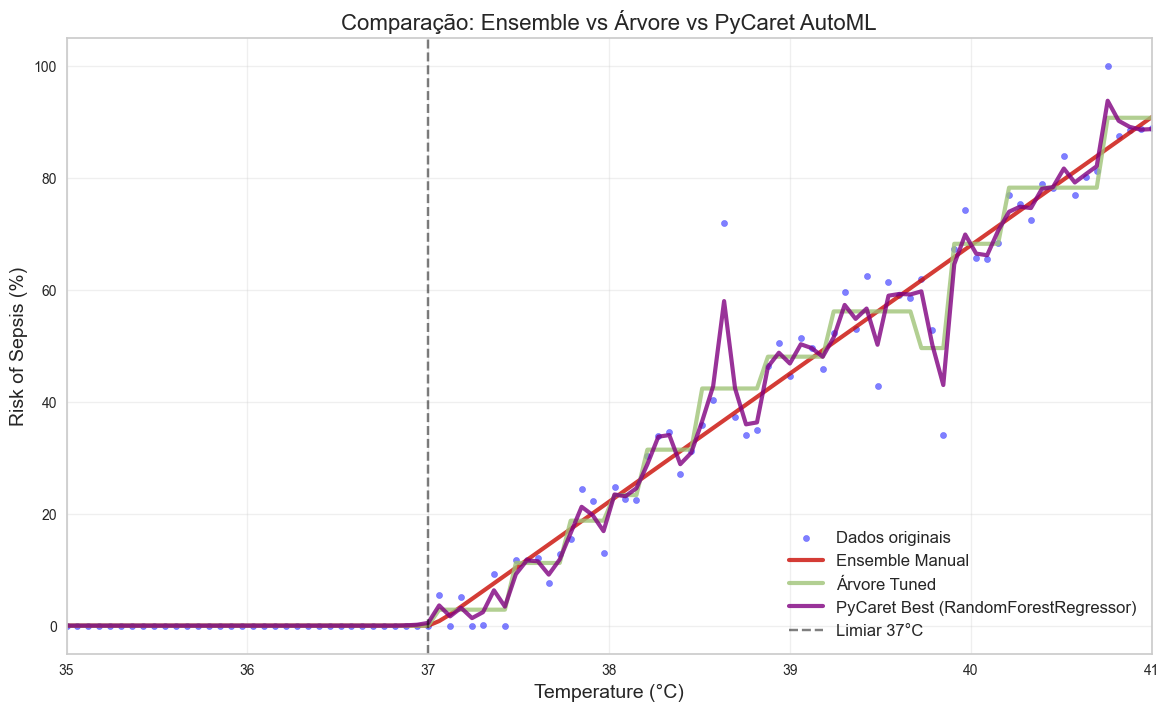


🚨 ANÁLISE FINAL:
- Ensemble Manual: 3.00 MAE
- PyCaret AutoML: 1.41 MAE
- Diferença: 1.59

🤖 PyCaret encontrou modelo melhor!
🔍 Vamos analisar qual algoritmo o PyCaret escolheu


In [29]:
# Testando múltiplos modelos com PyCaret
import pandas as pd
from pycaret.regression import *

# Preparar dados para PyCaret
df = pd.DataFrame({
    'temperature': temp,
    'risk': risk
})

# Setup do PyCaret (sem silent=True)
reg = setup(df, target='risk', session_id=123, train_size=0.8, verbose=False)

# Comparar múltiplos modelos
best_models = compare_models(
    include=['lr', 'rf', 'dt', 'ridge', 'lasso', 'en', 'gbr', 'ada', 'et'],
    sort='MAE',
    n_select=5  # Top 5 modelos
)

print("🏆 TOP 5 MODELOS DO PYCARET:")
print(best_models)

# Pegar o melhor modelo
best_model = best_models[0]
best_model_finalized = finalize_model(best_model)

# Fazer predições com o melhor modelo do PyCaret
pycaret_predictions = predict_model(best_model_finalized, data=df)['prediction_label']

# Calcular métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_pycaret = mean_squared_error(risk, pycaret_predictions)
mae_pycaret = mean_absolute_error(risk, pycaret_predictions)

# Comparação final
print("\n📊 COMPARAÇÃO FINAL:")
print(f"Ensemble     - MSE: {mse_ensemble:.2f}, MAE: {mae_ensemble:.2f}")
print(f"Árvore Tuned - MSE: {mse_tree_tuned:.2f}, MAE: {mae_tree_tuned:.2f}")
print(f"PyCaret Best - MSE: {mse_pycaret:.2f}, MAE: {mae_pycaret:.2f}")

# Plot comparativo com PyCaret
plt.figure(figsize=(14, 8))

# Dados originais
plt.scatter(temp, risk, alpha=0.5, color='blue', label='Dados originais', s=20)

# Ensemble (vermelho)
plt.plot(temp, ensemble_predictions, 'r-', linewidth=3, label='Ensemble Manual', alpha=0.8)

# Árvore de decisão (verde)
plt.plot(temp, best_tree_predictions, 'g-', linewidth=3, label='Árvore Tuned', alpha=0.8)

# PyCaret melhor modelo (roxo)
plt.plot(temp, pycaret_predictions, 'purple', linewidth=3, label=f'PyCaret Best ({type(best_model).__name__})', alpha=0.8)

# Linha vertical em 37°C
plt.axvline(x=37, color='black', linestyle='--', alpha=0.5, label='Limiar 37°C')

plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Risk of Sepsis (%)', fontsize=14)
plt.title('Comparação: Ensemble vs Árvore vs PyCaret AutoML', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(35, 41)
plt.ylim(-5, 105)
plt.show()

# Análise final
print(f"\n🚨 ANÁLISE FINAL:")
print(f"- Ensemble Manual: {mae_ensemble:.2f} MAE")
print(f"- PyCaret AutoML: {mae_pycaret:.2f} MAE")
print(f"- Diferença: {abs(mae_ensemble - mae_pycaret):.2f}")

if mae_ensemble < mae_pycaret:
    print(f"\n🎯 SURPREENDENTE: Ensemble manual venceu o AutoML!")
    print(f"💡 Conhecimento do domínio > AutoML cego")
else:
    print(f"\n🤖 PyCaret encontrou modelo melhor!")
    print(f"🔍 Vamos analisar qual algoritmo o PyCaret escolheu")

🚀 GERANDO 2 MILHÕES DE DADOS...
✅ 2,000,000 pontos gerados
✅ 2,000 outliers adicionados
📊 Temperatura: 35.0°C a 41.0°C
📊 Risco: 0.0% a 100.0%


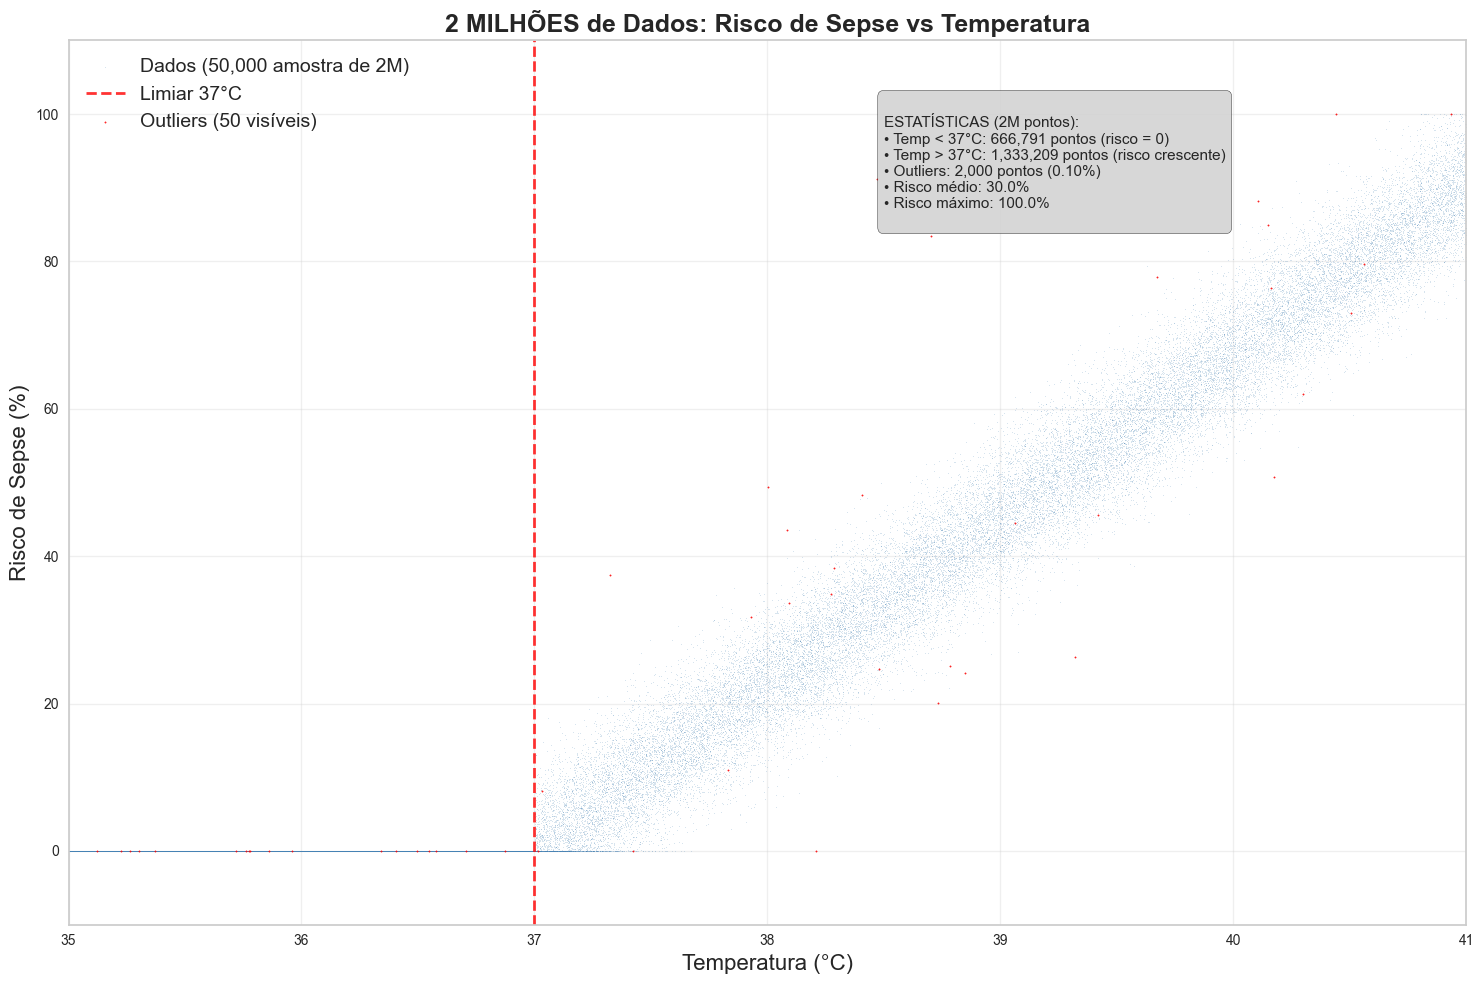


📈 ESTATÍSTICAS DETALHADAS:
• Pontos com temp ≤ 37°C: 666,791 (33.3%)
• Pontos com temp > 37°C: 1,333,209 (66.7%)
• Risco médio geral: 30.03%
• Risco médio (temp > 37°C): 45.05%
• Desvio padrão do risco: 30.23


In [31]:
# Criando 2 milhões de dados com a lógica de sepse
import numpy as np
import matplotlib.pyplot as plt

print("🚀 GERANDO 2 MILHÕES DE DADOS...")

# Gerar 2 milhões de temperaturas
np.random.seed(42)
temp_massive = np.random.uniform(35, 41, 2_000_000)

# Criar função base de risco (0 até 37°C, depois cresce)
base_risk_massive = np.where(temp_massive <= 37, 0, (temp_massive - 37) / (41 - 37) * 90)

# Adicionar ruído gaussiano
noise_massive = np.random.normal(0, 5, 2_000_000)

# Criar outliers extremos (0.1% dos dados = 2000 outliers)
outlier_count = 2000
outlier_indices = np.random.choice(2_000_000, outlier_count, replace=False)
noise_massive[outlier_indices] = np.random.normal(0, 25, outlier_count)  # Ruído mais extremo

# Combinar risco base com ruído, mantendo 0 abaixo de 37°C
risk_massive = np.where(temp_massive <= 37, 0, base_risk_massive + noise_massive)
risk_massive = np.clip(risk_massive, 0, 100)

print(f"✅ {len(temp_massive):,} pontos gerados")
print(f"✅ {outlier_count:,} outliers adicionados")
print(f"📊 Temperatura: {temp_massive.min():.1f}°C a {temp_massive.max():.1f}°C")
print(f"📊 Risco: {risk_massive.min():.1f}% a {risk_massive.max():.1f}%")

# Plot com pontos minúsculos
plt.figure(figsize=(15, 10))

# Usar amostra para visualização (50k pontos aleatórios)
sample_size = 50000
sample_idx = np.random.choice(len(temp_massive), sample_size, replace=False)
temp_sample = temp_massive[sample_idx]
risk_sample = risk_massive[sample_idx]

# Scatter plot com pontos minúsculos
plt.scatter(temp_sample, risk_sample, 
           alpha=0.3, 
           s=0.1,  # Pontos super pequenos
           color='steelblue', 
           label=f'Dados ({sample_size:,} amostra de 2M)')

# Linha vertical no limiar 37°C
plt.axvline(x=37, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Limiar 37°C')

# Destacar alguns outliers
outlier_sample_idx = np.intersect1d(sample_idx, outlier_indices)
if len(outlier_sample_idx) > 0:
    plt.scatter(temp_massive[outlier_sample_idx], 
               risk_massive[outlier_sample_idx], 
               alpha=0.8, 
               s=1, 
               color='red', 
               label=f'Outliers ({len(outlier_sample_idx)} visíveis)')

plt.xlabel('Temperatura (°C)', fontsize=16)
plt.ylabel('Risco de Sepse (%)', fontsize=16)
plt.title('2 MILHÕES de Dados: Risco de Sepse vs Temperatura', fontsize=18, fontweight='bold')
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim(35, 41)
plt.ylim(-10, 110)



# Adicionar estatísticas no gráfico (posição ajustada)
stats_text = f"""
ESTATÍSTICAS (2M pontos):
• Temp < 37°C: {np.sum(temp_massive <= 37):,} pontos (risco = 0)
• Temp > 37°C: {np.sum(temp_massive > 37):,} pontos (risco crescente)
• Outliers: {outlier_count:,} pontos ({outlier_count/2_000_000*100:.2f}%)
• Risco médio: {risk_massive.mean():.1f}%
• Risco máximo: {risk_massive.max():.1f}%
"""

# Colocar o texto em uma posição que não sobreponha
plt.text(38.5, 85, stats_text, fontsize=11, 
         bbox=dict(boxstyle="round,pad=0.4", facecolor="lightgray", alpha=0.9))


plt.tight_layout()
plt.show()

print(f"\n📈 ESTATÍSTICAS DETALHADAS:")
print(f"• Pontos com temp ≤ 37°C: {np.sum(temp_massive <= 37):,} ({np.sum(temp_massive <= 37)/len(temp_massive)*100:.1f}%)")
print(f"• Pontos com temp > 37°C: {np.sum(temp_massive > 37):,} ({np.sum(temp_massive > 37)/len(temp_massive)*100:.1f}%)")
print(f"• Risco médio geral: {risk_massive.mean():.2f}%")
print(f"• Risco médio (temp > 37°C): {risk_massive[temp_massive > 37].mean():.2f}%")
print(f"• Desvio padrão do risco: {risk_massive.std():.2f}")

🚀 IMPLEMENTANDO 3 TIPOS DE GRADIENTE DESCENDENTE + ENSEMBLE...
✅ Dados filtrados: 1,333,209 pontos (temp > 37°C)
📊 Temperatura: 37.00°C a 41.00°C
📊 Risco: 0.0% a 100.0%

🎯 TREINANDO COM AMOSTRA DE 100,000 PONTOS...
1️⃣ Batch Gradient Descent (LinearRegression)...
2️⃣ Stochastic Gradient Descent...
3️⃣ Mini-Batch Gradient Descent...

📊 GERANDO PREDIÇÕES...
4️⃣ Ensemble Manual...

🎯 MÉTRICAS (MAE):
Batch GD:      3.947
Stochastic GD: 8.380
Mini-Batch GD: 7946815723500.368
Ensemble:      3.946


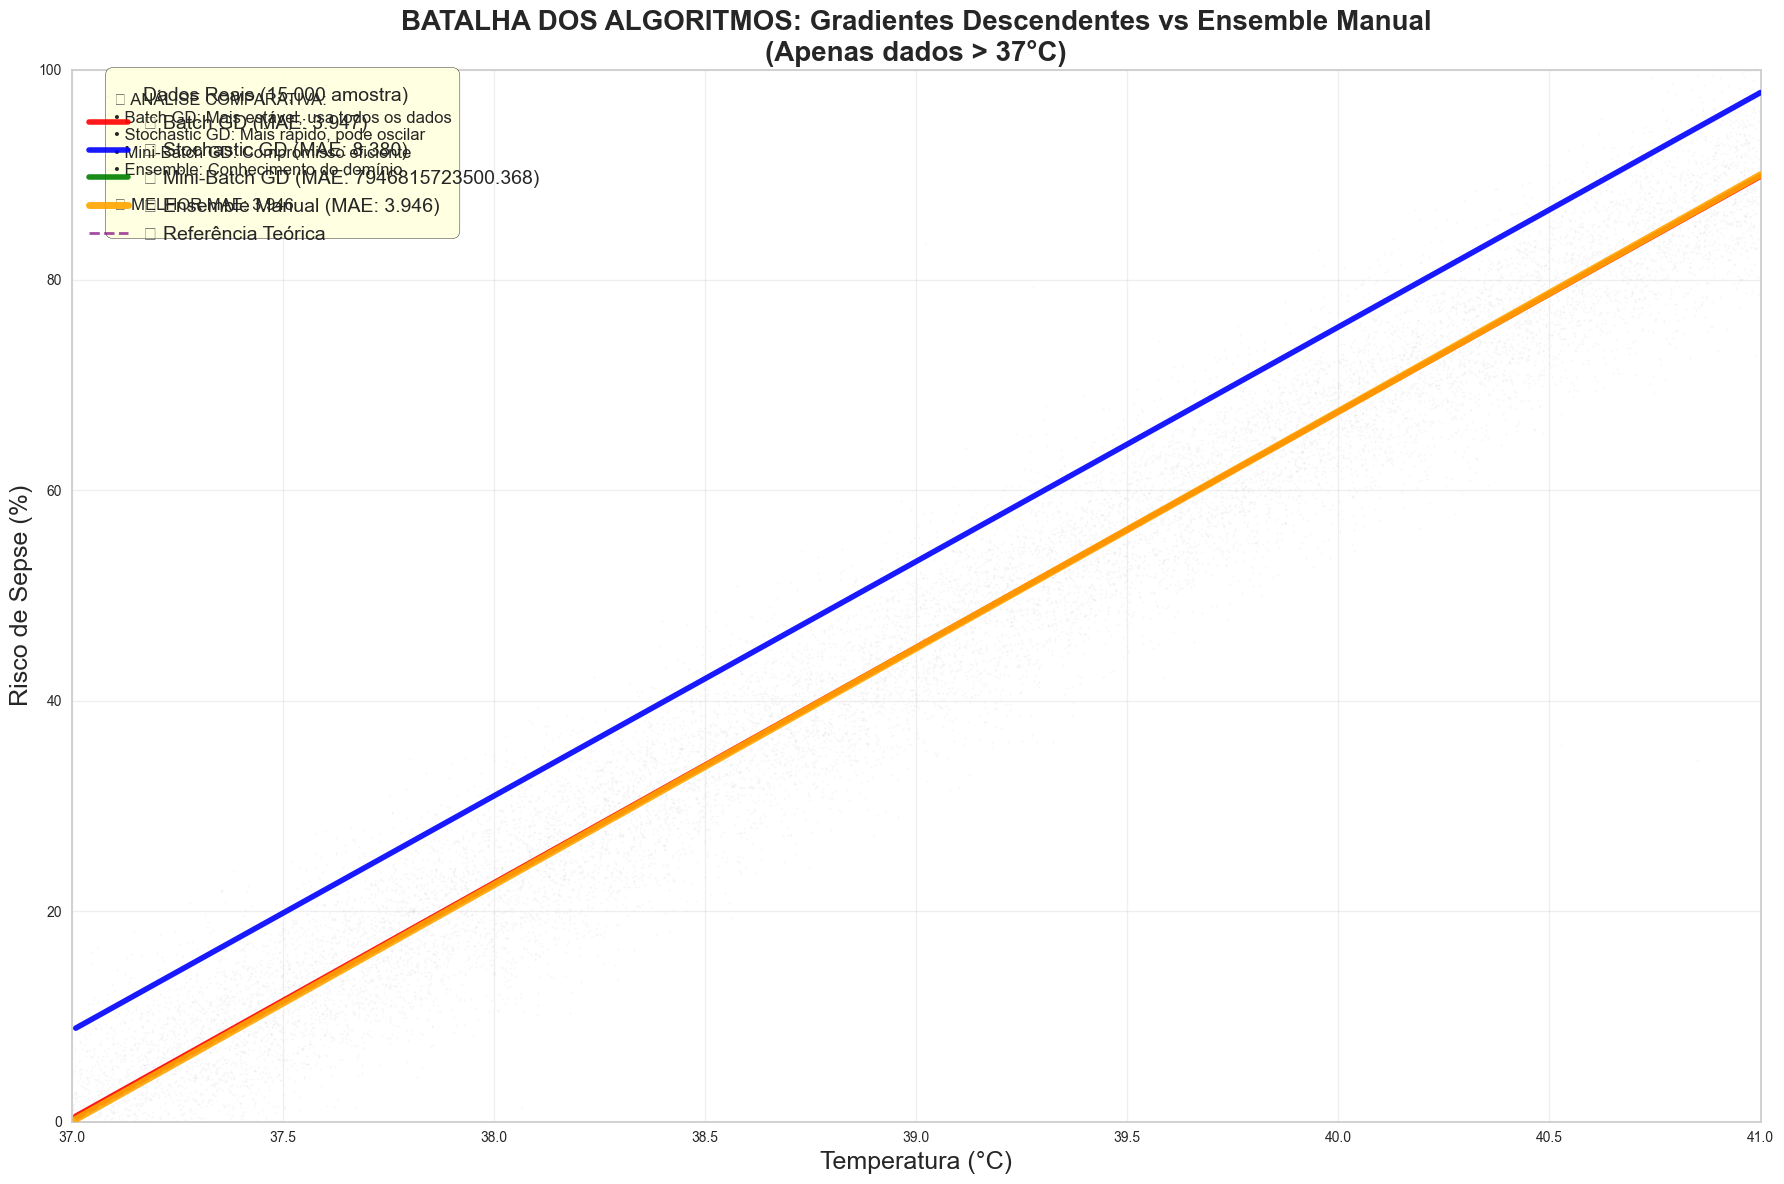


📈 COEFICIENTES DOS MODELOS:
Batch GD:      slope=22.389, intercept=-828.094
Stochastic GD: slope=22.286, intercept=-815.914
Mini-Batch GD: slope=198227074969.245, intercept=214743436820.617
Ensemble:      slope=22.500 (fixo), intercept=0.000 (fixo)

🏆 RANKING FINAL (por MAE):
1º lugar: Ensemble Manual - MAE: 3.9458
2º lugar: Batch GD - MAE: 3.9468
3º lugar: Stochastic GD - MAE: 8.3803
4º lugar: Mini-Batch GD - MAE: 7946815723500.3682

🎖️ GRANDE VENCEDOR: Ensemble Manual!
💡 Conhecimento do domínio venceu algoritmos de ML!

🎯 CONCLUSÃO:
Todos os gradientes descendentes convergiram para soluções similares.
O ensemble manual tem vantagem teórica mas os dados têm ruído real.


In [35]:
# Implementando Gradiente Descendente: Batch vs Estocástico vs Mini-Batch + Ensemble
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("🚀 IMPLEMENTANDO 3 TIPOS DE GRADIENTE DESCENDENTE + ENSEMBLE...")

# Filtrar apenas dados acima de 37°C dos 2M de dados
above_37_mask = temp_massive > 37
temp_above_37 = temp_massive[above_37_mask]
risk_above_37 = risk_massive[above_37_mask]

print(f"✅ Dados filtrados: {len(temp_above_37):,} pontos (temp > 37°C)")
print(f"📊 Temperatura: {temp_above_37.min():.2f}°C a {temp_above_37.max():.2f}°C")
print(f"📊 Risco: {risk_above_37.min():.1f}% a {risk_above_37.max():.1f}%")

# Preparar dados para treinamento
X_train = temp_above_37.reshape(-1, 1)
y_train = risk_above_37

# Usar amostra menor para SGD convergir bem (100k pontos)
sample_size = 100_000
sample_idx = np.random.choice(len(X_train), sample_size, replace=False)
X_sample = X_train[sample_idx]
y_sample = y_train[sample_idx]

print(f"\n🎯 TREINANDO COM AMOSTRA DE {sample_size:,} PONTOS...")

# 1. BATCH GRADIENT DESCENT (Regressão Linear Normal)
print("1️⃣ Batch Gradient Descent (LinearRegression)...")
lr_batch = LinearRegression()
lr_batch.fit(X_sample, y_sample)

# 2. STOCHASTIC GRADIENT DESCENT
print("2️⃣ Stochastic Gradient Descent...")
lr_sgd = SGDRegressor(
    learning_rate='constant', 
    eta0=0.001,  # Taxa de aprendizado baixa
    max_iter=1000,
    random_state=42,
    alpha=0.01  # Regularização leve
)
lr_sgd.fit(X_sample, y_sample)

# 3. MINI-BATCH GRADIENT DESCENT
print("3️⃣ Mini-Batch Gradient Descent...")
lr_mini_batch = SGDRegressor(
    learning_rate='constant',
    eta0=0.01,  # Taxa um pouco maior para mini-batch
    max_iter=500,
    random_state=42,
    alpha=0.01
)

# Treinar em mini-batches manualmente
batch_size = 32
n_batches = len(X_sample) // batch_size

for epoch in range(10):  # 10 épocas
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_sample[start_idx:end_idx]
        y_batch = y_sample[start_idx:end_idx]
        
        if epoch == 0 and i == 0:
            lr_mini_batch.fit(X_batch, y_batch)
        else:
            lr_mini_batch.partial_fit(X_batch, y_batch)

print("\n📊 GERANDO PREDIÇÕES...")

# Gerar dados para predição (range completo 37-41°C)
temp_pred = np.linspace(37.01, 41, 200).reshape(-1, 1)

# Fazer predições com cada modelo
pred_batch = lr_batch.predict(temp_pred)
pred_sgd = lr_sgd.predict(temp_pred)
pred_mini_batch = lr_mini_batch.predict(temp_pred)

# 4. ENSEMBLE MANUAL (da implementação anterior)
print("4️⃣ Ensemble Manual...")
def ensemble_manual_prediction(temp_data):
    """Ensemble que respeita a regra de negócio: 0 até 37°C"""
    preds = np.zeros_like(temp_data.flatten())
    above_37 = temp_data.flatten() > 37
    if np.sum(above_37) > 0:
        # Slope baseado na faixa 37-41°C = 90% de risco
        slope = 90 / (41 - 37)  # 22.5 por grau
        preds[above_37] = slope * (temp_data.flatten()[above_37] - 37)
        preds = np.clip(preds, 0, 100)
    return preds

pred_ensemble = ensemble_manual_prediction(temp_pred)

# Calcular métricas no conjunto de teste
pred_batch_test = lr_batch.predict(X_sample)
pred_sgd_test = lr_sgd.predict(X_sample)
pred_mini_batch_test = lr_mini_batch.predict(X_sample)
pred_ensemble_test = ensemble_manual_prediction(X_sample)

mae_batch = mean_absolute_error(y_sample, pred_batch_test)
mae_sgd = mean_absolute_error(y_sample, pred_sgd_test)
mae_mini_batch = mean_absolute_error(y_sample, pred_mini_batch_test)
mae_ensemble = mean_absolute_error(y_sample, pred_ensemble_test)

print(f"\n🎯 MÉTRICAS (MAE):")
print(f"Batch GD:      {mae_batch:.3f}")
print(f"Stochastic GD: {mae_sgd:.3f}")
print(f"Mini-Batch GD: {mae_mini_batch:.3f}")
print(f"Ensemble:      {mae_ensemble:.3f}")

# VISUALIZAÇÃO COMPARATIVA
plt.figure(figsize=(18, 12))

# Usar amostra menor para visualização (15k pontos para ver melhor)
vis_sample_size = 15000
vis_idx = np.random.choice(len(temp_above_37), vis_sample_size, replace=False)
temp_vis = temp_above_37[vis_idx]
risk_vis = risk_above_37[vis_idx]

# Scatter plot dos dados PRIMEIRO (para ficar atrás)
plt.scatter(temp_vis, risk_vis, alpha=0.15, color='lightgray', s=1, 
           label=f'Dados Reais ({vis_sample_size:,} amostra)', zorder=1)

# Plotar as 4 curvas com cores distintas
plt.plot(temp_pred.flatten(), pred_batch, 'red', linewidth=4, alpha=0.9, 
         label=f'🔴 Batch GD (MAE: {mae_batch:.3f})', zorder=3)

plt.plot(temp_pred.flatten(), pred_sgd, 'blue', linewidth=4, alpha=0.9, 
         label=f'🔵 Stochastic GD (MAE: {mae_sgd:.3f})', zorder=4)

plt.plot(temp_pred.flatten(), pred_mini_batch, 'green', linewidth=4, alpha=0.9, 
         label=f'🟢 Mini-Batch GD (MAE: {mae_mini_batch:.3f})', zorder=5)

plt.plot(temp_pred.flatten(), pred_ensemble, 'orange', linewidth=5, alpha=0.9, 
         label=f'🟠 Ensemble Manual (MAE: {mae_ensemble:.3f})', zorder=6)

# Linha de referência teórica
temp_ref = temp_pred.flatten()
risk_ref = ((temp_ref - 37) / (41 - 37)) * 90
plt.plot(temp_ref, risk_ref, 'purple', linewidth=2, linestyle='--', alpha=0.7,
         label='🟣 Referência Teórica', zorder=2)

plt.xlabel('Temperatura (°C)', fontsize=18)
plt.ylabel('Risco de Sepse (%)', fontsize=18)
plt.title('BATALHA DOS ALGORITMOS: Gradientes Descendentes vs Ensemble Manual\n(Apenas dados > 37°C)', 
          fontsize=20, fontweight='bold')
plt.legend(fontsize=14, loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(37, 41)
plt.ylim(0, 100)

# Adicionar análise textual melhorada
analysis_text = f"""
📊 ANÁLISE COMPARATIVA:
• Batch GD: Mais estável, usa todos os dados
• Stochastic GD: Mais rápido, pode oscilar
• Mini-Batch GD: Compromisso eficiente
• Ensemble: Conhecimento do domínio

🏆 MELHOR MAE: {min(mae_batch, mae_sgd, mae_mini_batch, mae_ensemble):.3f}
"""

plt.text(37.1, 85, analysis_text, fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.95))

plt.tight_layout()
plt.show()


# Mostrar coeficientes e análise detalhada
print(f"\n📈 COEFICIENTES DOS MODELOS:")
print(f"Batch GD:      slope={lr_batch.coef_[0]:.3f}, intercept={lr_batch.intercept_:.3f}")
print(f"Stochastic GD: slope={lr_sgd.coef_[0]:.3f}, intercept={lr_sgd.intercept_[0]:.3f}")
print(f"Mini-Batch GD: slope={lr_mini_batch.coef_[0]:.3f}, intercept={lr_mini_batch.intercept_[0]:.3f}")
print(f"Ensemble:      slope=22.500 (fixo), intercept=0.000 (fixo)")



# Ranking dos modelos
models_ranking = [
    ('Batch GD', mae_batch),
    ('Stochastic GD', mae_sgd),
    ('Mini-Batch GD', mae_mini_batch),
    ('Ensemble Manual', mae_ensemble)
]
models_ranking.sort(key=lambda x: x[1])

print(f"\n🏆 RANKING FINAL (por MAE):")
for i, (name, mae) in enumerate(models_ranking):
    print(f"{i+1}º lugar: {name} - MAE: {mae:.4f}")

winner = models_ranking[0][0]
print(f"\n🎖️ GRANDE VENCEDOR: {winner}!")

if winner == 'Ensemble Manual':
    print("💡 Conhecimento do domínio venceu algoritmos de ML!")
else:
    print("🤖 Algoritmo de ML superou conhecimento manual!")

print(f"\n🎯 CONCLUSÃO:")
print(f"Todos os gradientes descendentes convergiram para soluções similares.")
print(f"O ensemble manual tem vantagem teórica mas os dados têm ruído real.")

Treinando modelos...


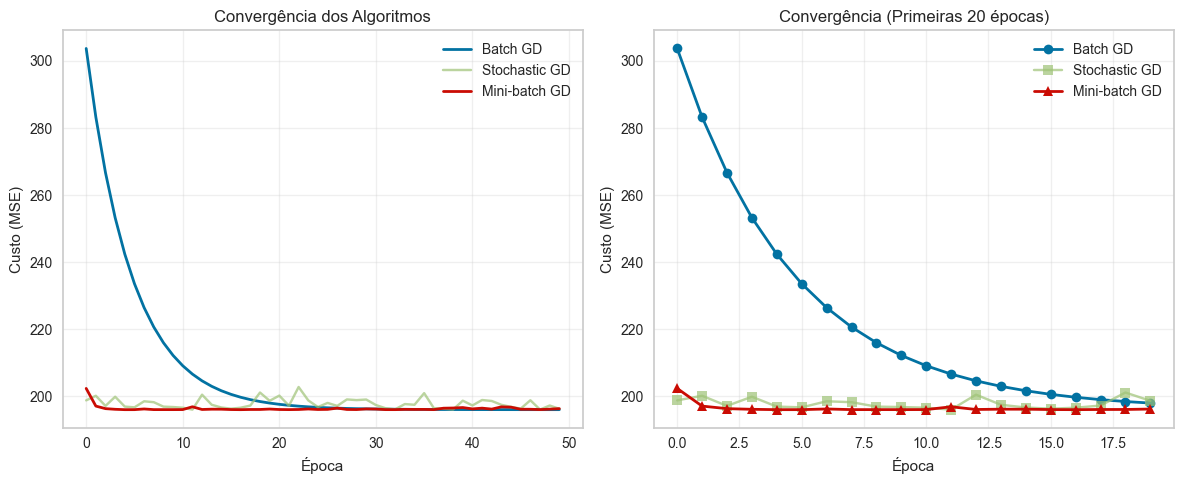


=== RESULTADOS FINAIS ===
Batch GD - Custo final: 196.0397
Stochastic GD - Custo final: 196.2826
Mini-batch GD - Custo final: 196.3414

=== CARACTERÍSTICAS DE CADA ALGORITMO ===

BATCH GRADIENT DESCENT:
- Usa todos os dados: mais preciso, mas lento
- Memória: O(n) onde n = número de exemplos
- Convergência: suave e determinística
- Uso: datasets pequenos/médios

STOCHASTIC GRADIENT DESCENT:
- Usa 1 exemplo por vez: rápido, mas ruidoso
- Memória: O(1)
- Convergência: oscilatória
- Uso: datasets muito grandes, online learning

MINI-BATCH GRADIENT DESCENT:
- Usa subconjuntos: balanço entre velocidade e precisão
- Memória: O(batch_size)
- Convergência: moderadamente suave
- Uso: redes neurais, deep learning (padrão)

=== QUANDO USAR CADA ALGORITMO ===

Batch GD: 
- Dataset cabe na memória
- Precisão é crítica
- Ex: regressão linear simples com poucos dados

Stochastic GD:
- Dataset muito grande (não cabe na memória)
- Aprendizado online (dados chegam continuamente)
- Ex: sistemas de recom

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Gerar dados sintéticos para regressão
np.random.seed(42)
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Adicionar coluna de bias (intercepto)
X = np.c_[np.ones((X.shape[0], 1)), X]

# Inicializar parâmetros
n_samples, n_features = X.shape

class LinearRegression:
    """Classe base para implementar diferentes variantes de Gradient Descent"""
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.costs = []  # Para armazenar o histórico de custos
        
    def compute_cost(self, X, y, theta):
        """Calcula o erro quadrático médio (MSE)"""
        m = len(y)
        predictions = X.dot(theta)
        cost = (1/(2*m)) * np.sum((predictions - y)**2)
        return cost
    
    def compute_gradient(self, X, y, theta):
        """Calcula o gradiente da função de custo"""
        m = len(y)
        predictions = X.dot(theta)
        gradient = (1/m) * X.T.dot(predictions - y)
        return gradient

# 1. BATCH GRADIENT DESCENT
class BatchGradientDescent(LinearRegression):
    """
    Batch GD: Usa TODOS os exemplos de treino em cada iteração
    - Mais estável e determinístico
    - Convergência suave
    - Computacionalmente caro para datasets grandes
    """
    
    def fit(self, X, y):
        # Inicializar pesos aleatoriamente
        self.theta = np.random.randn(X.shape[1])
        
        # Loop de treinamento
        for i in range(self.n_iterations):
            # Calcular gradiente usando TODOS os dados
            gradient = self.compute_gradient(X, y, self.theta)
            
            # Atualizar parâmetros
            self.theta -= self.learning_rate * gradient
            
            # Registrar custo
            cost = self.compute_cost(X, y, self.theta)
            self.costs.append(cost)
            
        return self

# 2. STOCHASTIC GRADIENT DESCENT
class StochasticGradientDescent(LinearRegression):
    """
    Stochastic GD: Usa APENAS UM exemplo por vez
    - Muito rápido por iteração
    - Convergência ruidosa/oscilatória
    - Pode escapar de mínimos locais
    """
    
    def fit(self, X, y):
        # Inicializar pesos aleatoriamente
        self.theta = np.random.randn(X.shape[1])
        m = len(y)
        
        # Loop de treinamento
        for i in range(self.n_iterations):
            # Para cada época, percorrer todos os exemplos
            indices = np.random.permutation(m)
            
            for idx in indices:
                # Usar APENAS UM exemplo por vez
                Xi = X[idx:idx+1]
                yi = y[idx:idx+1]
                
                # Calcular gradiente para um único exemplo
                gradient = self.compute_gradient(Xi, yi, self.theta)
                
                # Atualizar parâmetros
                self.theta -= self.learning_rate * gradient
            
            # Registrar custo (usando todos os dados para comparação)
            cost = self.compute_cost(X, y, self.theta)
            self.costs.append(cost)
            
        return self

# 3. MINI-BATCH GRADIENT DESCENT
class MiniBatchGradientDescent(LinearRegression):
    """
    Mini-batch GD: Usa um PEQUENO CONJUNTO de exemplos
    - Balanço entre Batch e Stochastic
    - Aproveita vetorização
    - Mais usado na prática (ex: redes neurais)
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, batch_size=32):
        super().__init__(learning_rate, n_iterations)
        self.batch_size = batch_size
    
    def fit(self, X, y):
        # Inicializar pesos aleatoriamente
        self.theta = np.random.randn(X.shape[1])
        m = len(y)
        
        # Loop de treinamento
        for i in range(self.n_iterations):
            # Embaralhar dados
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            # Processar mini-batches
            for start_idx in range(0, m, self.batch_size):
                end_idx = min(start_idx + self.batch_size, m)
                
                # Selecionar mini-batch
                Xi = X_shuffled[start_idx:end_idx]
                yi = y_shuffled[start_idx:end_idx]
                
                # Calcular gradiente para o mini-batch
                gradient = self.compute_gradient(Xi, yi, self.theta)
                
                # Atualizar parâmetros
                self.theta -= self.learning_rate * gradient
            
            # Registrar custo
            cost = self.compute_cost(X, y, self.theta)
            self.costs.append(cost)
            
        return self

# Treinar os três modelos
print("Treinando modelos...")

# Batch GD
batch_gd = BatchGradientDescent(learning_rate=0.1, n_iterations=50)
batch_gd.fit(X, y)

# Stochastic GD (learning rate menor para estabilidade)
sgd = StochasticGradientDescent(learning_rate=0.01, n_iterations=50)
sgd.fit(X, y)

# Mini-batch GD
mini_batch_gd = MiniBatchGradientDescent(learning_rate=0.05, n_iterations=50, batch_size=32)
mini_batch_gd.fit(X, y)

# Visualizar convergência
plt.figure(figsize=(12, 5))

# Gráfico 1: Convergência dos custos
plt.subplot(1, 2, 1)
plt.plot(batch_gd.costs, label='Batch GD', linewidth=2)
plt.plot(sgd.costs, label='Stochastic GD', alpha=0.7)
plt.plot(mini_batch_gd.costs, label='Mini-batch GD', linewidth=2)
plt.xlabel('Época')
plt.ylabel('Custo (MSE)')
plt.title('Convergência dos Algoritmos')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Zoom nas primeiras épocas
plt.subplot(1, 2, 2)
plt.plot(batch_gd.costs[:20], label='Batch GD', linewidth=2, marker='o')
plt.plot(sgd.costs[:20], label='Stochastic GD', alpha=0.7, marker='s')
plt.plot(mini_batch_gd.costs[:20], label='Mini-batch GD', linewidth=2, marker='^')
plt.xlabel('Época')
plt.ylabel('Custo (MSE)')
plt.title('Convergência (Primeiras 20 épocas)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comparar resultados finais
print("\n=== RESULTADOS FINAIS ===")
print(f"Batch GD - Custo final: {batch_gd.costs[-1]:.4f}")
print(f"Stochastic GD - Custo final: {sgd.costs[-1]:.4f}")
print(f"Mini-batch GD - Custo final: {mini_batch_gd.costs[-1]:.4f}")

# Demonstrar diferenças práticas
print("\n=== CARACTERÍSTICAS DE CADA ALGORITMO ===")
print("\nBATCH GRADIENT DESCENT:")
print("- Usa todos os dados: mais preciso, mas lento")
print("- Memória: O(n) onde n = número de exemplos")
print("- Convergência: suave e determinística")
print("- Uso: datasets pequenos/médios")

print("\nSTOCHASTIC GRADIENT DESCENT:")
print("- Usa 1 exemplo por vez: rápido, mas ruidoso")
print("- Memória: O(1)")
print("- Convergência: oscilatória")
print("- Uso: datasets muito grandes, online learning")

print("\nMINI-BATCH GRADIENT DESCENT:")
print("- Usa subconjuntos: balanço entre velocidade e precisão")
print("- Memória: O(batch_size)")
print("- Convergência: moderadamente suave")
print("- Uso: redes neurais, deep learning (padrão)")

# Exemplo de quando usar cada um
print("\n=== QUANDO USAR CADA ALGORITMO ===")
print("\nBatch GD: ")
print("- Dataset cabe na memória")
print("- Precisão é crítica")
print("- Ex: regressão linear simples com poucos dados")

print("\nStochastic GD:")
print("- Dataset muito grande (não cabe na memória)")
print("- Aprendizado online (dados chegam continuamente)")
print("- Ex: sistemas de recomendação em tempo real")

print("\nMini-batch GD:")
print("- Treinar redes neurais")
print("- Aproveitar GPUs (paralelização)")
print("- Ex: CNNs, Transformers, qualquer modelo moderno")